In [2]:
"""
GENERAL NOTE: Please print out numbers (i.e., accuracies, plots, etc.) so they are displayed to me when I run your cells. Use python's print() function.
"""

# import everything you might need

import torch
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
import pandas as pd
from xgboost import XGBClassifier
import random
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

**QUESTION 1**

In [3]:
"""
Q1: Calculate the gradient of the f(x, y, z) = 7x2z – 2xy3 + 5z at (-1, -2, 3). What does this vector represent?

YOUR ANSWER HERE
"""


# df/dx = 14xz - 2y^3
# df/dy = -6xy^2
# df/dz = 7x^2 + 5 

# gradient calculation
x = (14*-1*3)-((2*-2)**3)
y = -6*-1*(-2)**2
z = 7*(-1)**2 + 5

gradient = [x,y,z]
print(gradient)

[22, 24, 12]


**QUESTION 2**

In [3]:
# Let me download the files for you

##!wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/train.csv
##!wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/val.csv
##!wget https://github.com/jrgreen7/SYSC4906/releases/download/Ass1/test.csv

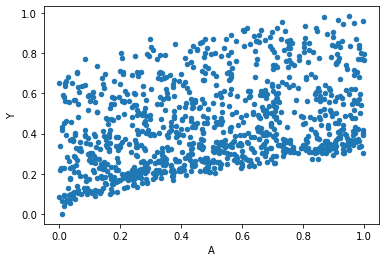

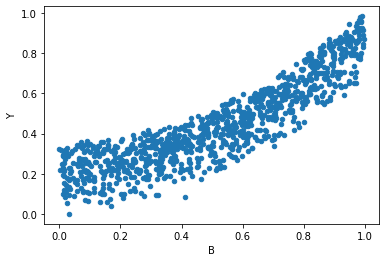

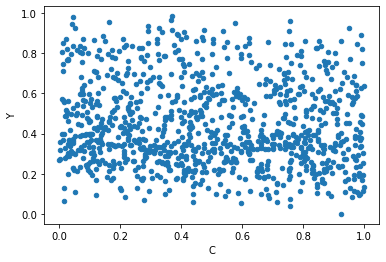

In [39]:
"""
Q2a: Use pandas to load train.csv, val.csv, and test.csv into three separate dataframes. Then, create three scatter plots of the train set with features A, B, and C on the x-axes and Y on the y-axes.

YOUR CODE BELOW, IN THIS CELL
"""
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("val.csv")
df_test = pd.read_csv("test.csv")

scatter_A = df_train.plot.scatter(x = "A", y = "Y")
scatter_B = df_train.plot.scatter(x = "B", y = "Y")
scatter_C = df_train.plot.scatter(x = "C", y = "Y")

In [ ]:
"""
Q2b: If you were using A, B, and C to predict Y (i.e., using linear regression), how well do you think these features would perform? Do you think nonlinear functions would fit the data better? Why or why not?

YOUR ANSWER HERE
"""
## A has a clear pattern of increase on a constant slope, 
## we could use this slope to predict Y, however there is high variance within analyzing the independent points, that stretch along the Y axis. 

# B could predict Y with a slightly underfit linear regression, but with a nonlinear function, B would predict Y very well as B has a changing slope.

## There is no clear correlation seen with C and Y. Linear regression is the same as choosing a random line of best fit.

In [ ]:
"""
Q2c: The data is already normalized, how can you tell?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

## values are in the intervals [0,1] and [0,1] for x and y. 

In [27]:
"""
Q2d: For each of the three input features, compute its square-root to create 3 additional features. Repeat for squaring the feature values to create another 3 features.
You now have 9 total input features: A, B, C, sqrt(A), sqrt(B), sqrt(C), A2, B2, C2. 
Do this for all three data splits (train, val, and test). You can think of these as polynomial kernels used in SVMs.

YOUR CODE BELOW, IN THIS CELL
"""

A_train = df_train.A
B_train = df_train.B
C_train = df_train.C

sqrtA_train = np.sqrt(df_train.A)
sqrtB_train = np.sqrt(df_train.B)
sqrtC_train = np.sqrt(df_train.C)

A2_train = np.sqrt(sqrtA_train)
B2_train = np.sqrt(sqrtB_train)
C2_train = np.sqrt(sqrtC_train)
####################
A_val = df_val.A
B_val = df_val.B
C_val = df_val.C

sqrtA_val = np.sqrt(df_val.A)
sqrtB_val = np.sqrt(df_val.B)
sqrtC_val = np.sqrt(df_val.C)

A2_val = np.sqrt(sqrtA_val)
B2_val = np.sqrt(sqrtB_val)
C2_val = np.sqrt(sqrtC_val)
#######################
A_test = df_test.A
B_test = df_test.B
C_test = df_test.C

sqrtA_test = np.sqrt(df_test.A)
sqrtB_test = np.sqrt(df_test.B)
sqrtC_test = np.sqrt(df_test.C)

A2_test = np.sqrt(sqrtA_test)
B2_test = np.sqrt(sqrtB_test)
C2_test = np.sqrt(sqrtC_test)
#######################



##Proof
print("Train: A"); print(A_train) ; print(" ")
print("Train: sqrt(A)"); print(sqrtA_train) ; print(" ")
print("Train: A2"); print(A2_train) ; print(" ")

Train: A
0      0.433429
1      0.596584
2      0.884875
3      0.145045
4      0.237964
         ...   
995    0.736293
996    0.995758
997    0.907777
998    0.021015
999    0.974958
Name: A, Length: 1000, dtype: float64
 
Train: sqrt(A)
0      0.658353
1      0.772389
2      0.940678
3      0.380848
4      0.487816
         ...   
995    0.858075
996    0.997877
997    0.952773
998    0.144964
999    0.987400
Name: A, Length: 1000, dtype: float64
 
Train: A2
0      0.811390
1      0.878856
2      0.969886
3      0.617129
4      0.698438
         ...   
995    0.926323
996    0.998938
997    0.976101
998    0.380742
999    0.993680
Name: A, Length: 1000, dtype: float64
 


**QUESTION 3**

In [40]:
"""
Q3a: Train a linear regression model on the train set using only the 3 original input features.

YOUR CODE BELOW, IN THIS CELL
"""

x = df_train[['A','B','C']]
y = df_train.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)

print("intercept: ", linearmodel.intercept_)
print("coeff below: ")

list(zip(['A','B','C'],linearmodel.coef_))


intercept:  0.0030530675285196374
coeff below: 


[('A', 0.26851498621856407),
 ('B', 0.6643599468825224),
 ('C', -0.060321617687309266)]

In [134]:
"""
Q3b: What are the mean absolute errors of the train set, val set, and test sets using this model? Did the model overfit the train set?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("Train mean absolute error: ",  mae)


###########
x = df_test[['A','B','C']]
y = df_test.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)
y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("test mean absolute error: ",  mae)

###########
x = df_val[['A','B','C']]
y = df_val.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)
y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("val mean absolute error: ",  mae)

Train mean absolute error:  0.04297622772687732
test mean absolute error:  0.04159282119008908
val mean absolute error:  0.0431781619871639


In [41]:
"""
Q3c: What are the values of the 4 learned parameters (3 weights and 1 bias)? Do these values make sense given your scatter plots in Q2a?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""


print("intercept: ", linearmodel.intercept_)
print("coeff below: ")

list(zip(['A','B','C'],linearmodel.coef_))


# yes they match the scatter plots 

intercept:  0.0030530675285196374
coeff below: 


[('A', 0.26851498621856407),
 ('B', 0.6643599468825224),
 ('C', -0.060321617687309266)]

In [138]:
"""
Q3d: Train another linear regression model using all 9 input features.

YOUR CODE BELOW, IN THIS CELL
"""



#append 6 more columns to the df
df_train['sqrtA'] = sqrtA_train ; df_train['sqrtB'] = sqrtB_train ; df_train['sqrtC'] = sqrtC_train ; 
df_train['A2'] = A2_train ; df_train['B2'] = B2_train ; df_train['C2'] = C2_train ;


x = df_train[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
y = df_train.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)

print("intercept: ", linearmodel.intercept_)
print("coeff below: ")

list(zip(['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2'],linearmodel.coef_))

intercept:  -0.16299377615622135
coeff below: 


[('A', -0.010609292514855909),
 ('B', 2.035405750912945),
 ('C', -0.09886866558837668),
 ('sqrtA', 0.3823195454276337),
 ('sqrtB', -2.7667367844510267),
 ('sqrtC', 0.06989344837542277),
 ('A2', -0.05031173939467251),
 ('B2', 1.5773899864621208),
 ('C2', -0.047699995019554825)]

In [102]:
"""
Q3e: What are the mean absolute errors of each dataset, using this new model?

YOUR CODE BELOW, IN THIS CELL
"""


y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("Train mean absolute error: ",  mae)


###########
#append 6 more columns to the df
df_test['sqrtA'] = sqrtA_test ; df_test['sqrtB'] = sqrtB_test ; df_test['sqrtC'] = sqrtC_test ; 
df_test['A2'] = A2_test ; df_test['B2'] = B2_test ; df_test['C2'] = C2_test ;

x = df_test[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
y = df_test.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)
y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("test mean absolute error: ",  mae)

###########
#append 6 more columns to the df
df_val['sqrtA'] = sqrtA_val ; df_val['sqrtB'] = sqrtB_val ; df_val['sqrtC'] = sqrtC_val ; 
df_val['A2'] = A2_val ; df_val['B2'] = B2_val ; df_val['C2'] = C2_val ;


x = df_val[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
y = df_val.Y

linearmodel = LinearRegression()
linearmodel.fit(x,y)
y_predicted = linearmodel.predict(x)
  
mae=mean_absolute_error(y,y_predicted)
print("val mean absolute error: ",  mae)

Train mean absolute error:  0.010948994293991814
test mean absolute error:  0.009509879626130665
val mean absolute error:  0.008164993912875992


In [104]:
"""
Q3f: How many learned parameters are there for this model, and what are their values?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""

print("intercept: ", linearmodel.intercept_)
print("coeff below: ")

list(zip(['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2'],linearmodel.coef_))

'\nQ3f: How many learned parameters are there for this model, and what are their values?\n\nYOUR CODE AND ANSWER BELOW, IN THIS CELL\n'

In [ ]:
"""
Q3g: Which model performs better? How can you explain the difference in performance?

YOUR ANSWER HERE
"""

#the linear regression model with 9 features per data set performs better
#this is because the linear regression model fits more accurately with more data. 

**QUESTION 4**

In [4]:
"""
Q4a: Use scikit-learn to train a logistic regression model on the train set using only the 3 original features. Again, just use the default hyper-parameters.

YOUR CODE BELOW, IN THIS CELL
"""


traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
valdata = pd.read_csv('val.csv')

x = traindata[['A','B','C']]
y = traindata.Label

xtest = testdata[['A','B','C',]]
ytest = testdata.Label

xval = valdata[['A','B','C',]]
yval = valdata.Label

logisticmodel = LogisticRegression()
logisticmodel.fit(x,y)



list(zip(['A','B','C'],logisticmodel.coef_))


[('A', array([-5.67457287, -6.76060305,  1.1851838 ])),
 ('B', array([-4.32041352, -7.63176394,  1.07494527])),
 ('C', array([-1.35379936, -6.2239603 ,  0.01419616]))]

In [152]:
"""
Q4b: What are the overall accuracies of the train, val, and test sets? Use scikit-learn’s accuracy_score metric.

YOUR CODE BELOW, IN THIS CELL
"""

y_pred = logisticmodel.predict(x)
print ("Accuracy train: ", accuracy_score(y, y_pred))


y_pred = logisticmodel.predict(xtest)
print ("Accuracy test: ", accuracy_score(ytest, y_pred))

y_pred = logisticmodel.predict(xval)
print ("Accuracy Val: ", accuracy_score(yval, y_pred))

Accuracy train:  0.528
Accuracy test:  0.481
Accuracy Val:  0.452


In [157]:
"""
Q4c: Train another logistic regression model on the train set using all 9 features. If it doesn’t converge, set max_iter to 5,000.

YOUR CODE BELOW, IN THIS CELL
"""

traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
valdata = pd.read_csv('val.csv')



#append 6 more columns to each df
traindata['sqrtA'] = sqrtA_train ; traindata['sqrtB'] = sqrtB_train ; traindata['sqrtC'] = sqrtC_train ; 
traindata['A2'] = A2_train ; traindata['B2'] = B2_train ; traindata['C2'] = C2_train ;

testdata['sqrtA'] = sqrtA_test ; testdata['sqrtB'] = sqrtB_test ; testdata['sqrtC'] = sqrtC_test ; 
testdata['A2'] = A2_test ; testdata['B2'] = B2_test ; testdata['C2'] = C2_test ;

valdata['sqrtA'] = sqrtA_val ; valdata['sqrtB'] = sqrtB_val ; valdata['sqrtC'] = sqrtC_val ; 
valdata['A2'] = A2_val ; valdata['B2'] = B2_val ; valdata['C2'] = C2_val ;



##logistic regression
x = traindata[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
y = traindata.Label

xtest = testdata[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
ytest = testdata.Label

xval = valdata[['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2']]
yval = valdata.Label

logisticmodel = LogisticRegression(max_iter = 5000)
logisticmodel.fit(x,y)



list(zip(['A','B','C', 'sqrtA','sqrtB','sqrtC','A2','B2','C2'],logisticmodel.coef_))


[('A',
  array([-3.32732467, -4.83692642,  0.98159683, -3.72754785, -4.62869289,
          0.59698458, -2.91932934, -3.33134012,  0.29312082])),
 ('B',
  array([-4.20727857, -5.37356823,  0.46228786, -1.54823725, -4.1228885 ,
          0.71848961, -0.09536335, -2.48534235,  0.67163728])),
 ('C',
  array([-1.50854173, -4.33039045,  0.1495189 , -0.52995705, -3.08986938,
          0.06412581, -0.18306024, -2.0066988 , -0.10262446])),
 ('sqrtA',
  array([ 1.1413461 , -3.38587896,  0.5319153 , -0.29491884, -0.79817579,
         -0.09925922, -0.66370449,  0.24368975, -0.30238705])),
 ('sqrtB',
  array([ 0.54405816, -0.8633519 , -0.80050578,  0.70386452,  0.89339069,
         -0.09865218,  0.52943927,  1.01551307,  0.28279588])),
 ('sqrtC',
  array([ 0.87248232,  1.49455215,  0.03949166,  0.42436043,  1.6877967 ,
         -0.20619987,  0.24781153,  1.17409046, -0.28005202])),
 ('A2',
  array([ 0.85450672,  3.53342158, -0.26856662,  0.45414539,  2.33416166,
          0.18468128,  0.11839729,  

In [161]:
"""
Q4d: Repeat b, but with your new logistic regression model.

YOUR CODE BELOW, IN THIS CELL
"""
y_pred = logisticmodel.predict(x)
print ("Accuracy train: ", accuracy_score(y, y_pred))


y_pred = logisticmodel.predict(xtest)
print ("Accuracy test: ", accuracy_score(ytest, y_pred))

y_pred = logisticmodel.predict(xval)
print ("Accuracy Val: ", accuracy_score(yval, y_pred))

Accuracy train:  0.528
Accuracy test:  0.481
Accuracy Val:  0.452


In [35]:
"""
Q4e: XGBoost is pre-installed on Google Colab. One hyper-parameter is the depth of the tree (called max_depth). Find the optimal value of max_depth, all other hyper-parameters can be ignored for this question.
That is, your model should look like: model = XGBClassifier(max_depth=L).fit(X,y). 
Hint: the test set should not be used to search for hyper-parameters. Train these models using only the 3 original features.

YOUR CODE BELOW, IN THIS CELL
"""
traindata = pd.read_csv('train.csv')
print(traindata.head())
X = traindata[['A','B','C']]
y = traindata.Label




for L in range(1,10):
    model = XGBClassifier(max_depth=L).fit(X,y)

    # make predictions for test data
    y_pred = model.predict(X)

    # evaluate predictions
    accuracy = accuracy_score(y, y_pred)
    print("depth = ", L, "Accuracy: ", accuracy )


          A         B         C         Y  Label
0  0.433429  0.684660  0.100264  0.554477      5
1  0.596584  0.427275  0.972302  0.344430      3
2  0.884875  0.566586  0.014994  0.555790      5
3  0.145045  0.427584  0.756287  0.228959      2
4  0.237964  0.684935  0.348287  0.481648      4
depth =  1 Accuracy:  0.806
depth =  2 Accuracy:  0.989
depth =  3 Accuracy:  1.0
depth =  4 Accuracy:  1.0
depth =  5 Accuracy:  1.0
depth =  6 Accuracy:  1.0
depth =  7 Accuracy:  1.0
depth =  8 Accuracy:  1.0
depth =  9 Accuracy:  1.0


In [36]:
"""
Q4f: Repeat Step b, but with your new XGBoost model (with the max_depth chosen from e).

YOUR CODE BELOW, IN THIS CELL
"""

traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')
valdata = pd.read_csv('val.csv')

x = traindata[['A','B','C']]
y = traindata.Label

xtest = testdata[['A','B','C',]]
ytest = testdata.Label

xval = valdata[['A','B','C',]]
yval = valdata.Label

model = XGBClassifier(max_depth=3).fit(X,y)

y_pred = model.predict(x)
print ("Accuracy train: ", accuracy_score(y, y_pred))

y_pred = model.predict(xtest)
print ("Accuracy test: ", accuracy_score(ytest, y_pred))

y_pred = model.predict(xval)
print ("Accuracy Val: ", accuracy_score(yval, y_pred))

Accuracy train:  1.0
1.0
Accuracy test:  0.838
Accuracy Val:  0.823


In [ ]:
"""
Q4g: Of your 3 models—two logistic regression models and one XGBoost model—which performs best on the test set? Why do you think this is the case?

YOUR ANSWER HERE
"""

#xgboost performs better than both regression models on the test set. 

**QUESTION 5**

In [ ]:
"""
Q5a: Using all 9 input features, we want to train a linear model (i.e., torch.nn.Linear) to predict the class label.
This is a multi-class classification problem, which of the following loss functions, available in PyTorch, best suits our task? Explain briefly.
torch.nn.CrossEntropyLoss()
torch.nn.MSELoss()
torch.nn.BCELoss()


YOUR ANSWER HERE
"""


# not Cross Entropy Loss or BCE, those loss functions are mostly used for binary classification problems
# therefore Mean Squared Error loss would best suit our task. its the default loss function for regression problems. 


In [ ]:
"""
Q5b: Your model will output 10 numbers, one for each class.
These are called logits. Do you need to compute the softmax across these 10 logits before applying your loss function (from a), or does the loss function compute the softmax for you?

YOUR ANSWER HERE
"""

#yes you need to compute softmax before loss function. it wont do it for you

Epoch[20/200], loss: 0.023546
Epoch[40/200], loss: 0.012146
Epoch[60/200], loss: 0.009718
Epoch[80/200], loss: 0.009201
Epoch[100/200], loss: 0.009091
Epoch[120/200], loss: 0.009067
Epoch[140/200], loss: 0.009062
Epoch[160/200], loss: 0.009061
Epoch[180/200], loss: 0.009061
Epoch[200/200], loss: 0.009061


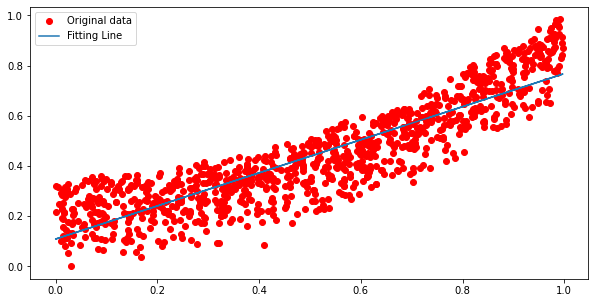

In [177]:
"""
Q5c: Using the loss function from a, train a linear model using PyTorch and stochastic gradient descent (SGD).
Use a batch size of 1, a learning rate of 0.3 and train for 200 epochs. You can update your model weights “manually” or use an optimizer.

YOUR CODE BELOW, IN THIS CELL
"""


######## I struggled trying to load our csv into a tensordf. I was finally able to get it, however only using one feature 
#############################################
########


train = pd.read_csv('train.csv')
train_df = pd.DataFrame(train)

x_train = train_df[['B']]
y_train = train_df[['Y']]

x_train = torch.tensor(x_train.values)
x_train = x_train.to(torch.float)
y_train = torch.tensor(y_train.values)
y_train = y_train.to(torch.float)


model = linearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

for epoch in range(200):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{200}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()




Epoch[20/200], loss: 0.012740
Epoch[40/200], loss: 0.009800
Epoch[60/200], loss: 0.009148
Epoch[80/200], loss: 0.009004
Epoch[100/200], loss: 0.008972
Epoch[120/200], loss: 0.008965
Epoch[140/200], loss: 0.008964
Epoch[160/200], loss: 0.008963
Epoch[180/200], loss: 0.008963
Epoch[200/200], loss: 0.008963


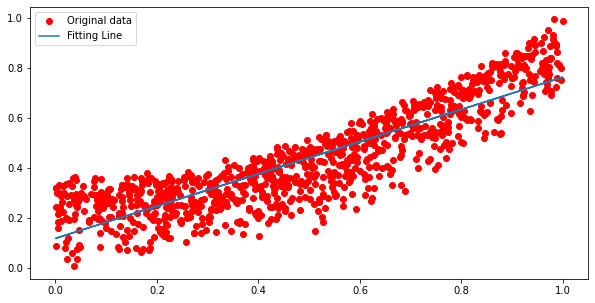

Epoch[20/200], loss: 0.033538
Epoch[40/200], loss: 0.013841
Epoch[60/200], loss: 0.009958
Epoch[80/200], loss: 0.009193
Epoch[100/200], loss: 0.009042
Epoch[120/200], loss: 0.009012
Epoch[140/200], loss: 0.009007
Epoch[160/200], loss: 0.009005
Epoch[180/200], loss: 0.009005
Epoch[200/200], loss: 0.009005


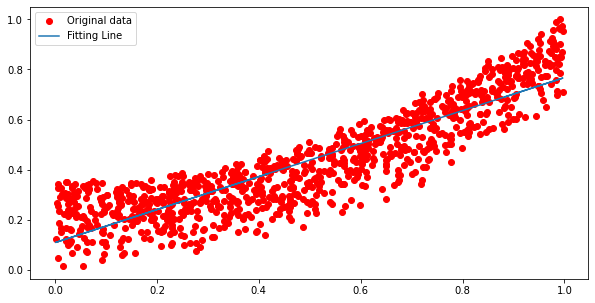

In [178]:
"""
Q5d: Use the trained model to make predictions on the val and test sets. Calculate the overall accuracy of both sets.

YOUR CODE BELOW, IN THIS CELL
"""




test = pd.read_csv('test.csv')
test_df = pd.DataFrame(test)

x_test = test_df[['B']]
y_test = test_df[['Y']]

x_test = torch.tensor(x_test.values)
x_test = x_test.to(torch.float)
y_test = torch.tensor(y_test.values)
y_test = y_test.to(torch.float)


model = linearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

for epoch in range(200):
    inputs = x_test
    target = y_test

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{200}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
    predict = model(x_test)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_test.numpy(), y_test.numpy(), 'ro', label='Original data')
plt.plot(x_test.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()




##########################

val = pd.read_csv('val.csv')
val_df = pd.DataFrame(val)

x_val = val_df[['B']]
y_val = val_df[['Y']]

x_val = torch.tensor(x_val.values)
x_val = x_val.to(torch.float)
y_val = torch.tensor(y_val.values)
y_val = y_val.to(torch.float)


model = linearRegression()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

for epoch in range(200):
    inputs = x_val
    target = y_val

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{200}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
    predict = model(x_val)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_val.numpy(), y_val.numpy(), 'ro', label='Original data')
plt.plot(x_val.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()

In [120]:
"""
Q5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?

YOUR CODE AND ANSWER BELOW, IN THIS CELL
"""


# this is the Bias Variance Trade-off
# it is also because of the SGD. each time the SGD is run on the data, it learns a slightly different model.

'\nQ5e: Repeat parts c and d three times. You should get different results each run. There are two main reasons for this. What are they?\n\nYOUR CODE AND ANSWER BELOW, IN THIS CELL\n'